# Anomaly Detection & Visuals

Run anomaly detection, then explore the anomalies with simple visuals from `mlarena` package. 

In [0]:
# Third-party imports
import numpy as np
import pandas as pd
import mlflow
from sklearn.ensemble import IsolationForest
from mlarena import PreProcessor
import mlarena.utils.plot_utils as put

# Local application imports
import de_utils as dut

#Load Data

In [0]:
df = spark.sql("SELECT * FROM bupa_call_synthetic_dataset_with_sentiment_score").toPandas()

In [0]:
col_of_interest = ['AppTag', 'NPS', 'NCR', 'average_score', 'first_chunk_score', 'last_chunk_score', 'average_score']
X = df[col_of_interest]


In [0]:
X.display()

AppTag NPS NCR average_score first_chunk_score last_chunk_score average_score Claim Status 9 10 0.957009047 0.829031825 0.999780118 0.957009047 Policy Change 2 3 0.997922897 0.993598223 0.999689341 0.997922897 Claim Status 6 9 0.939606577 0.759724677 0.999595821 0.939606577 Provider Network 9 2 0.995768815 0.984406114 0.999761403 0.995768815 Policy Change 3 2 0.999053001 0.997458994 0.999739587 0.999053001 Online Portal Issue 9 10 0.999084145 0.997919023 0.999632955 0.999084145 Gap Cover 6 8 0.998635054 0.995673716 0.999670744 0.998635054 Online Portal Issue 0 9 0.998426124 0.994898021 0.999644041 0.998426124 Payment Issue 4 5 0.997370496 0.990806639 0.999576271 0.997370496 Coverage Inquiry 10 2 0.998949692 0.996822119 0.999533176 0.998949692 Policy Change 3 8 0.999167114 0.998048544 0.999377191 0.999167114 Gap Cover 1 10 0.994796932 0.980499685 0.999504805 0.994796932 Coverage Inquiry 8 5 0.999213398 0.998116612 0.999654651 0.999213398 Appointment Booking 9 7 0.998429537 0.995130062 0.999502063 0.998429537 Gap Cover 5 5 0.998390198 0.994758904 0.99978441 0.998390198 Claim Status 6 4 0.95706062 0.829031825 0.999746621 0.95706062 Online Portal Issue 0 4 0.997612298 0.992944896 0.998185217 0.997612298 Policy Change 2 8 0.999194413 0.997787833 0.99975282 0.999194413 Online Portal Issue 2 3 0.99876669 0.9963153 0.999764383 0.99876669 Gap Cover 1 4 0.996199489 0.985989451 0.999731004 0.996199489 Policy Change 8 5 0.998687029 0.997925758 0.998765469 0.998687029 Claim Status 7 7 0.931663871 0.727768421 0.999532819 0.931663871 Premium Increase 9 10 0.998781145 0.996178865 0.999621868 0.998781145 Payment Issue 4 8 0.991228923 0.966201961 0.999778807 0.991228923 Gap Cover 6 10 0.998839304 0.996509969 0.999596179 0.998839304 Premium Increase 5 9 0.999200672 0.997821689 0.999730527 0.999200672 Policy Change 8 6 0.998677462 0.9965114 0.998902678 0.998677462 Online Portal Issue 6 2 0.998507515 0.995585084 0.999304652 0.998507515 Gap Cover 5 6 0.998952165 0.997033477 0.999739349 0.998952165 Benefit Enquiry 9 8 0.999085858 0.99738127 0.999579489 0.999085858 Gap Cover 0 5 0.997508541 0.991726041 0.999592125 0.997508541 Premium Increase 5 10 0.99931033 0.998301625 0.99969995 0.99931033 Benefit Enquiry 6 6 0.998924166 0.998125732 0.998345733 0.998924166 Gap Cover 10 9 0.99775809 0.993083119 0.999446332 0.99775809 Premium Increase 3 4 0.998815 0.997424841 0.999403358 0.998815 Benefit Enquiry 6 9 0.999029785 0.997288823 0.99960655 0.999029785 Coverage Inquiry 0 3 0.998909056 0.996535778 0.999659657 0.998909056 Policy Change 5 9 0.998825356 0.996252656 0.99966836 0.998825356 Premium Increase 9 4 0.999292046 0.998340607 0.999707162 0.999292046 Gap Cover 6 6 0.996983498 0.989786386 0.999559939 0.996983498 Policy Change 10 9 0.997432902 0.991158664 0.999627352 0.997432902 Policy Change 6 7 0.999078959 0.998034775 0.999737442 0.999078959 Benefit Enquiry 5 8 0.999172077 0.997645438 0.999689698 0.999172077 Gap Cover 2 7 0.998010054 0.993152618 0.999499202 0.998010054 Coverage Inquiry 2 1 0.997443661 0.992302537 0.999474347 0.997443661 Benefit Enquiry 4 4 0.999446571 0.998932183 0.999643207 0.999446571 Policy Change 7 1 0.998281777 0.994414091 0.999626398 0.998281777 Benefit Enquiry 2 10 0.999037713 0.997689843 0.999465287 0.999037713 Appointment Booking 4 9 0.998351783 0.994611502 0.999720871 0.998351783 Benefit Enquiry 2 2 0.99921532 0.997962594 0.999546826 0.99921532 Premium Increase 7 6 0.997846574 0.993420541 0.999467075 0.997846574 Premium Increase 8 6 0.999046311 0.997424841 0.999705732 0.999046311 Online Portal Issue 6 2 0.994352773 0.978502512 0.999538183 0.994352773 Appointment Booking 7 3 0.998574764 0.996580303 0.998405039 0.998574764 Provider Network 9 10 0.997799769 0.993435502 0.998766065 0.997799769 Policy Change 9 7 0.998345822 0.994781792 0.999502778 0.998345822 Online Portal Issue 9 2 0.992884025 0.972519636 0.999705493 0.992884025 Premium Increase 2 6 0.998106465 0.993524432 0.999603927 0.998106465 Online Portal Issue 7 9 0.995586827 0

# Anomaly Detection

In [0]:
# data preprocessing
preprocessor = PreProcessor(drop='if_binary')
X_transformed = preprocessor.fit_transform(X)
# anomaly detection with Isolation Forest
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_transformed)
y_pred = clf.predict(X_transformed)
y_pred = np.where(y_pred==-1,1,0)  #(-1 = anomaly, 1 = normal)
scores = clf.decision_function(X_transformed) 

# Compare Anomaly vs Rest

## Scores of the Anomaly vs Rest

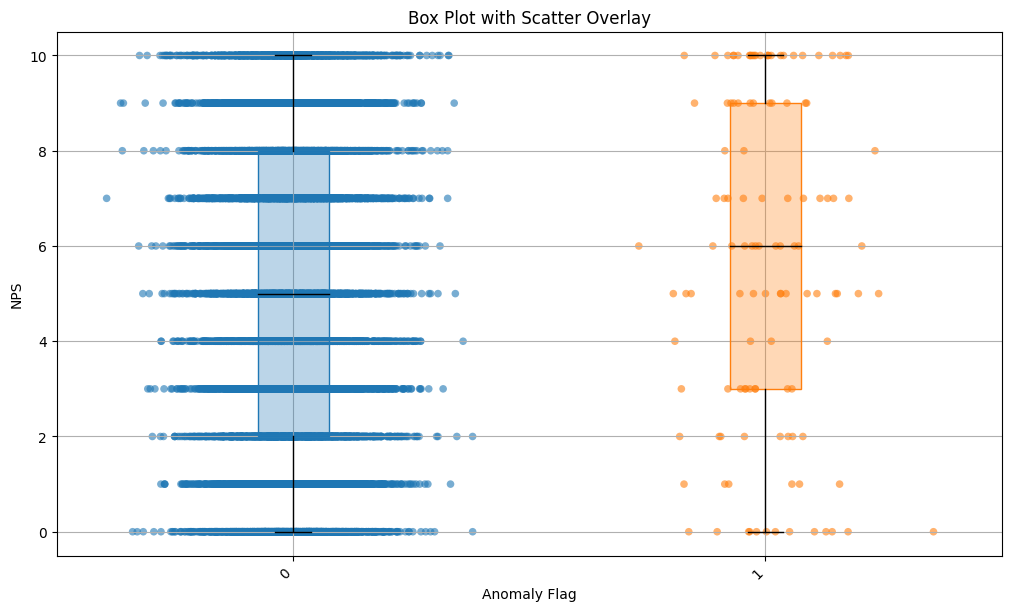

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='NPS', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag")

In [0]:
display(summary_table)

AnomalyFlag n mean median sd 0 11880 5.035942760942761 5.0 3.166263632864539 1 120 5.7 6.0 3.433889433085385

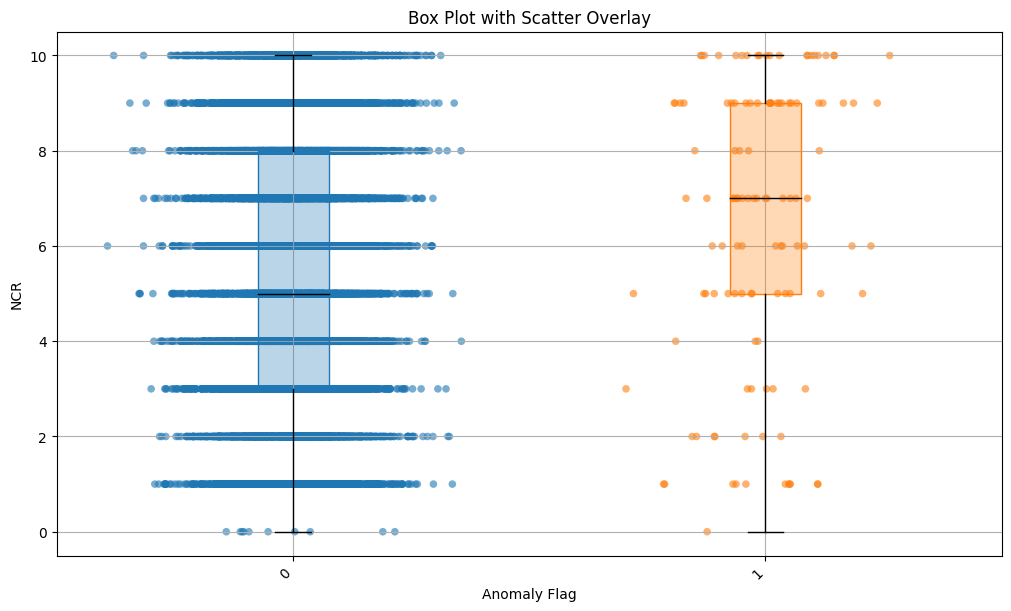

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='NCR', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag")

## Sentiment of the Anomaly vs Rest

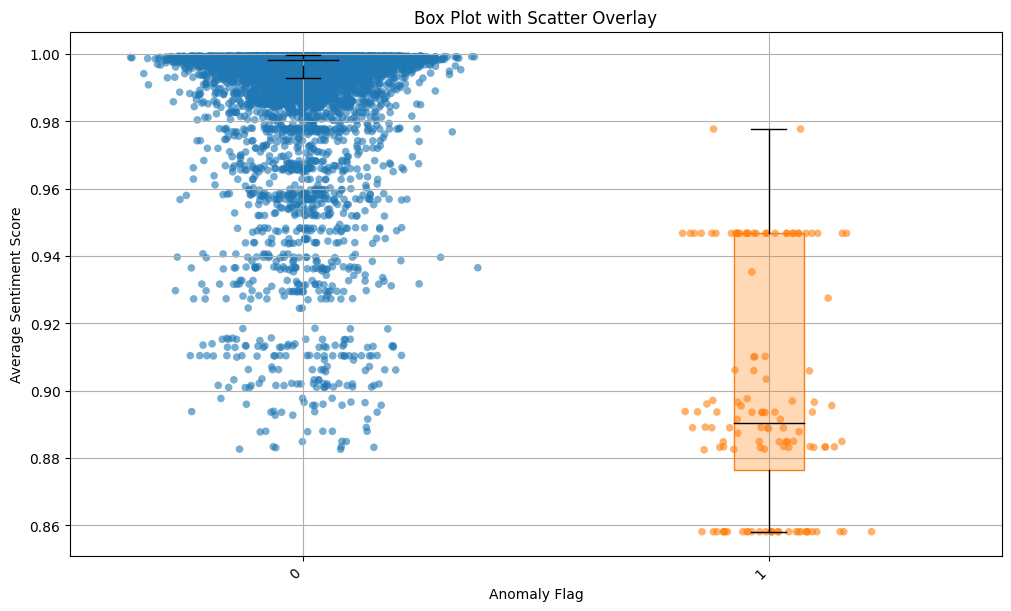

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='average_score', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag",
                                              ylabel = "Average Sentiment Score")

In [0]:
display(summary_table)

AnomalyFlag n mean median sd 0 11880 0.9937022398345118 0.9982261214999999 0.014542871785669756 1 120 0.8989650556583333 0.890325755 0.034273409703118624

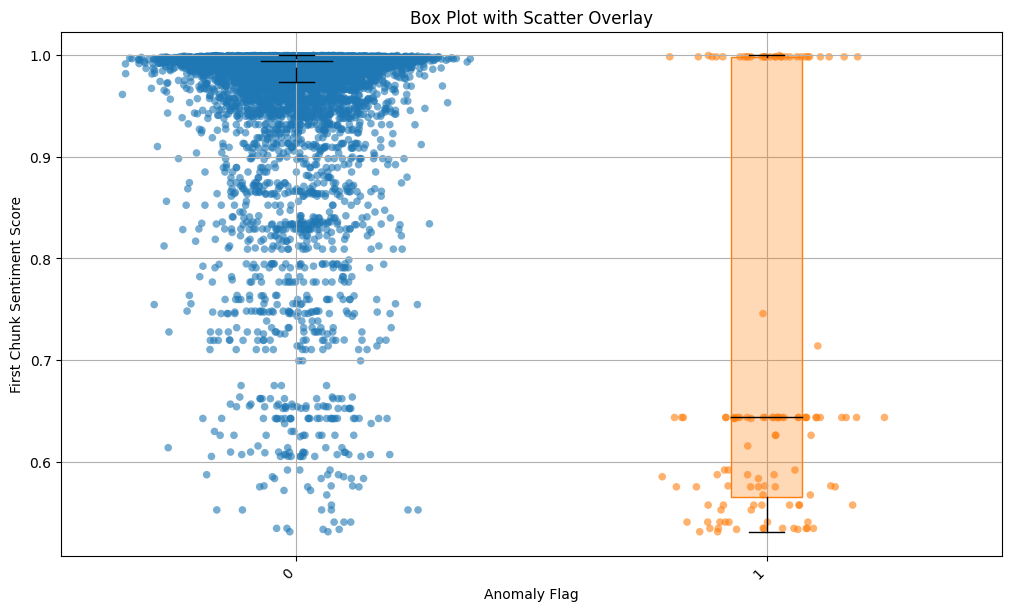

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='first_chunk_score', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag",
                                              ylabel = "First Chunk Sentiment Score")

In [0]:
display(summary_table)

AnomalyFlag n mean median sd 0 11880 0.9764258150315657 0.994415641 0.058118181982987877 1 120 0.7038290397416667 0.643704355 0.18315304761536122

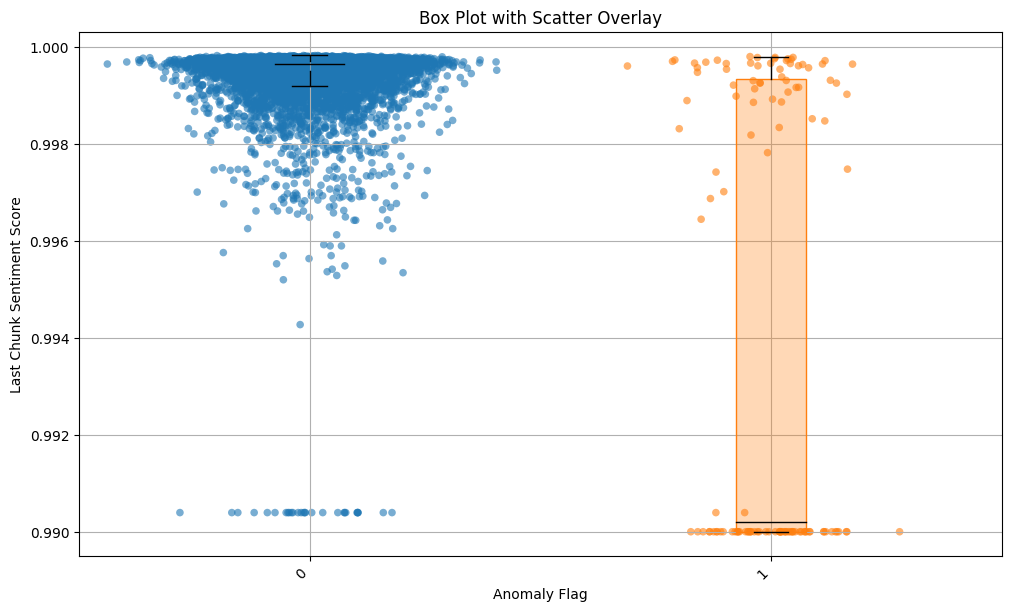

In [0]:
fig, fx, summary_table = put.plot_box_scatter(df, x='AnomalyFlag', y='last_chunk_score', 
                                              return_summary=True,
                                              xlabel= "Anomaly Flag",
                                              ylabel = "Last Chunk Sentiment Score")

In [0]:
display(summary_table)

AnomalyFlag n mean median sd 0 11880 0.9994974149602693 0.999644518 6.020740994060249E-4 1 120 0.9944270842416667 0.9902057645 0.004607861936179687

# Comparisons across Topics

## Scores across Topic with Anomaly Highlighted


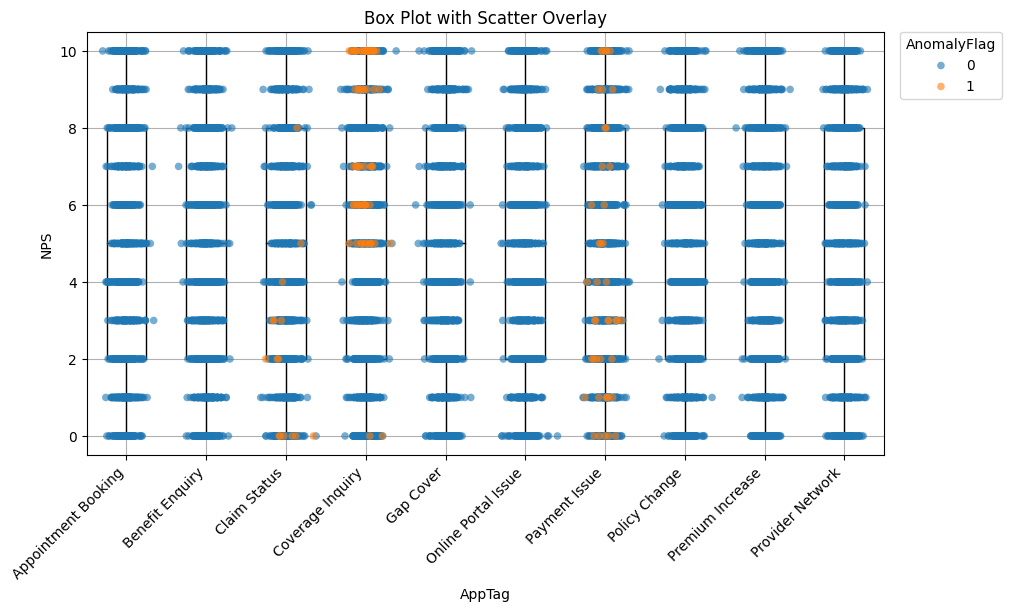

In [0]:
score = 'NPS' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

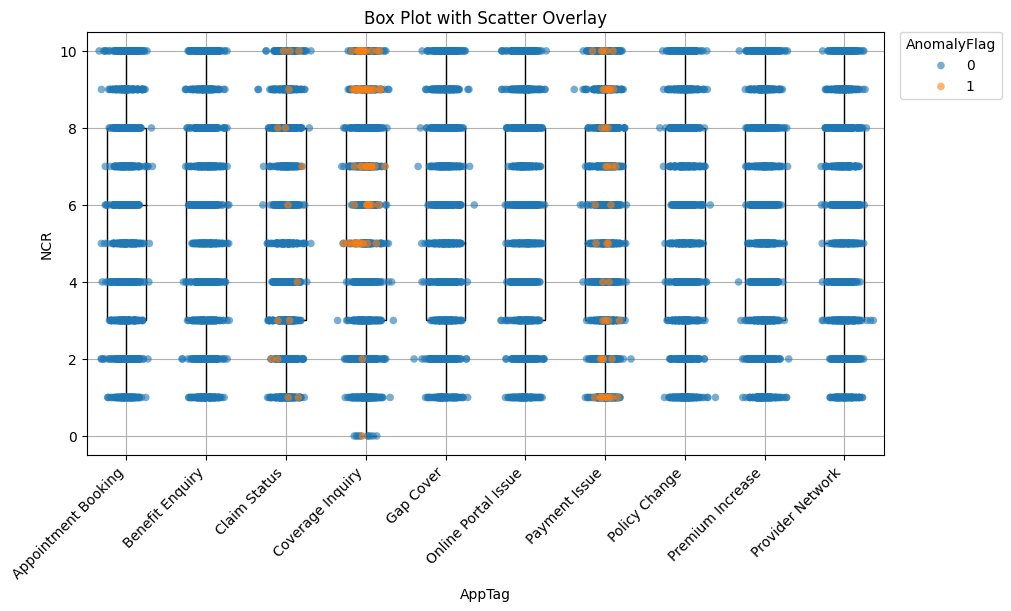

In [0]:
score = 'NCR' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

## Sentiment across Topic with Anomaly Highlighted

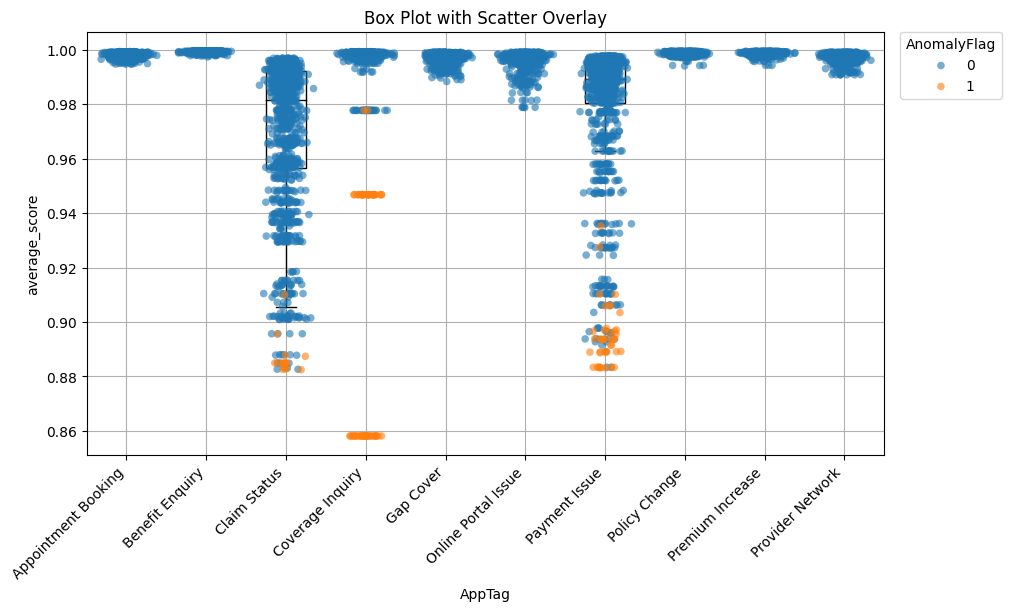

In [0]:
score = 'average_score' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')


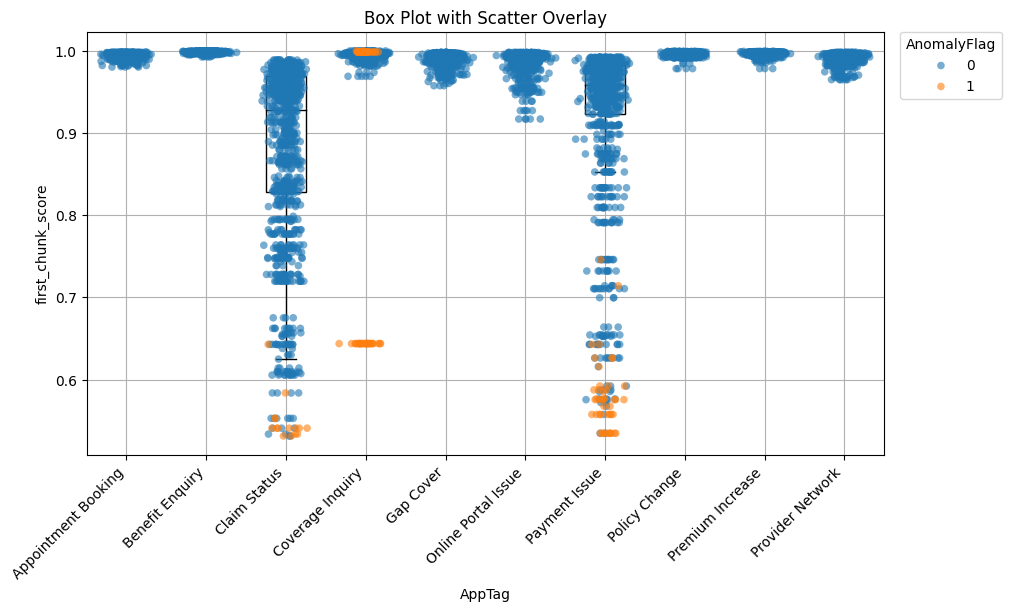

In [0]:
score = 'first_chunk_score' 
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

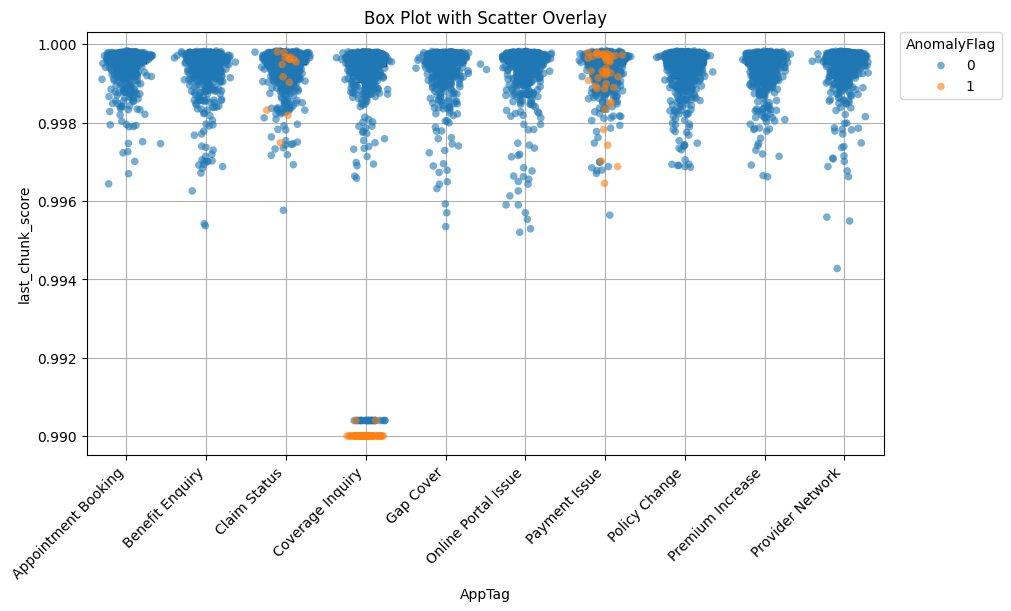

In [0]:
score = 'last_chunk_score'  
fig, ax = put.plot_box_scatter(df, x='AppTag', y=score, 
                               point_hue = 'AnomalyFlag')

# 6. Changes Over Time

## Proportions of Anomaly Hilighted over Time

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Time Series Stacked Bar Chart'}, xlabel='Hour', ylabel='Percentage'>)

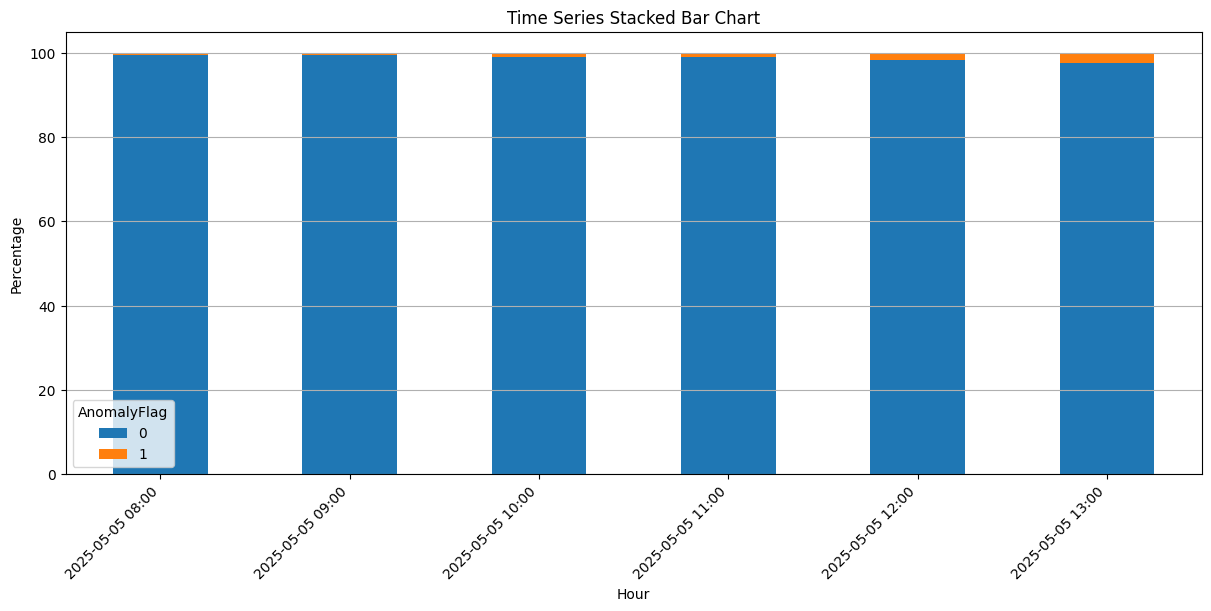

In [0]:
put.plot_stacked_bar_over_time(data=df, x= "DatetimeStamp", y = "AnomalyFlag",
                               freq = "h", is_pct = True)

## Distribution of Scores with Anomaly Hilighted over Time

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution Over Time'}, xlabel='Hour', ylabel='NPS'>)

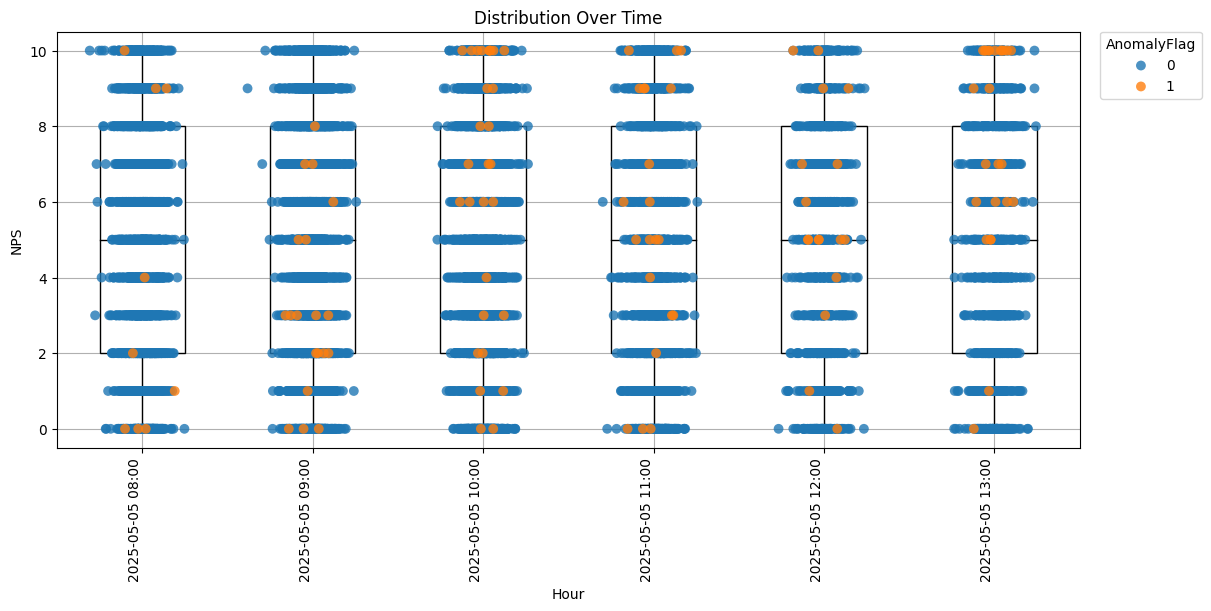

In [0]:
metric = 'NPS'
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                freq = 'h', point_hue = 'AnomalyFlag')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Distribution Over Time'}, xlabel='Hour', ylabel='NCR'>)

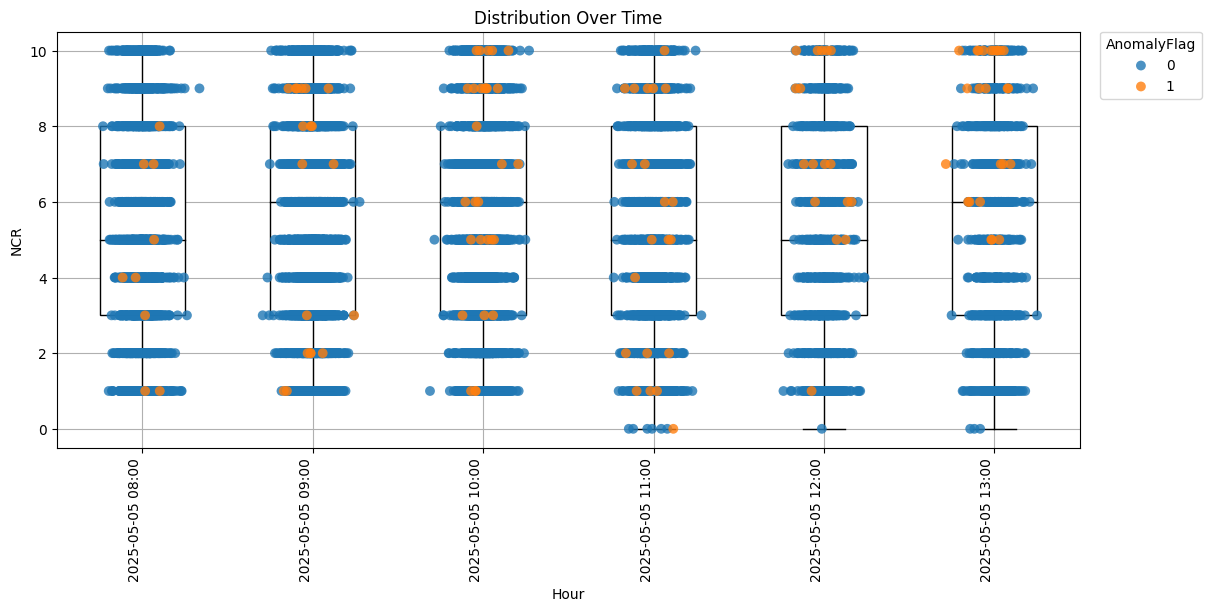

In [0]:
metric = 'NCR'
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                freq = 'h', point_hue = 'AnomalyFlag')

## Distribution of Sentiment with Anomaly Hilighted over Time


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'First Chunk Sentiment Trend'}, xlabel='Hour', ylabel='First Chunk Sentiment'>)

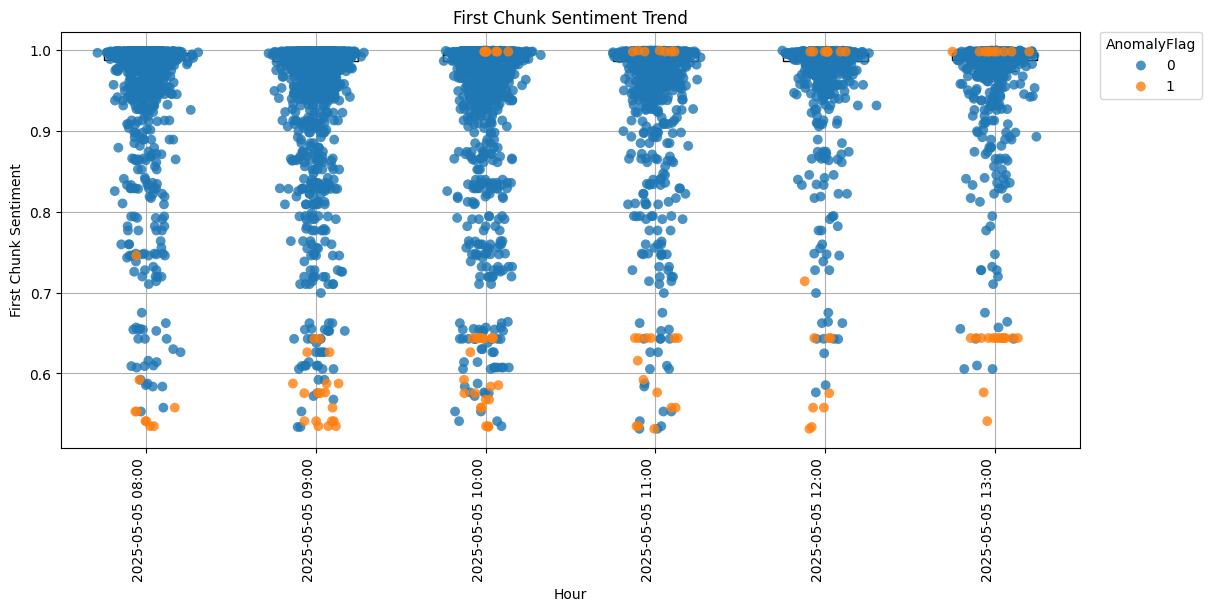

In [0]:
metric = 'first_chunk_score'
metric_print = "First Chunk Sentiment"
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                ylabel=metric_print,
                                title=f"{metric_print} Trend",
                                freq = 'h', point_hue = 'AnomalyFlag')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Last Chunk Sentiment Trend'}, xlabel='Hour', ylabel='Last Chunk Sentiment'>)

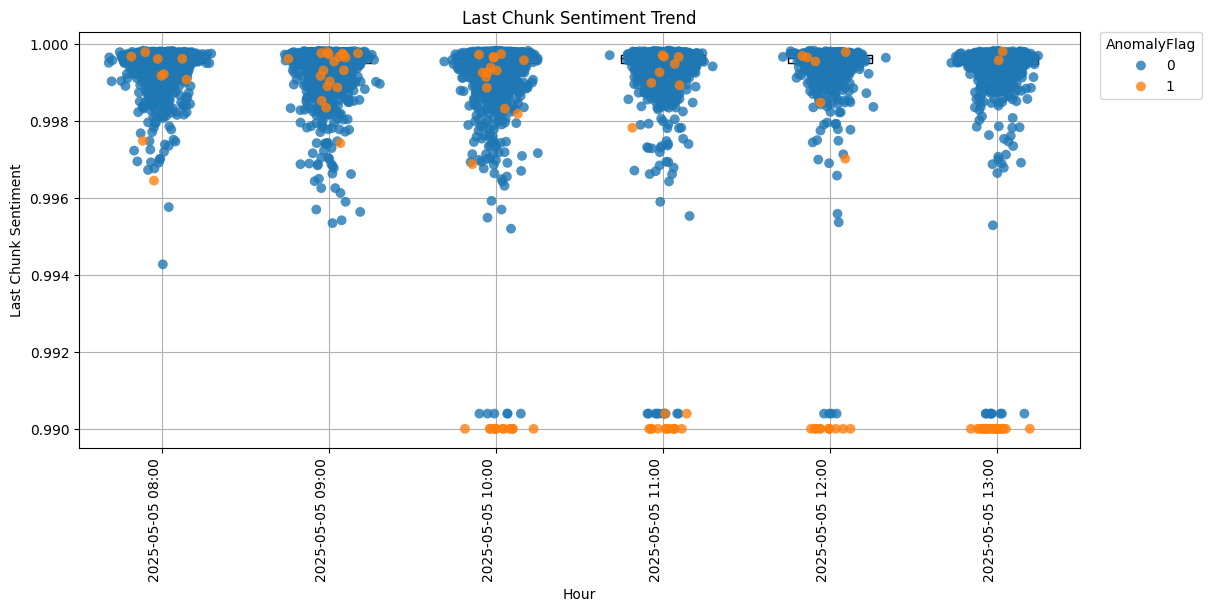

In [0]:
metric = 'last_chunk_score'
metric_print = "Last Chunk Sentiment"
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                ylabel=metric_print,
                                title=f"{metric_print} Trend",
                                freq = 'h', point_hue = 'AnomalyFlag')

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Overall Sentiment Trend'}, xlabel='Hour', ylabel='Overall Sentiment'>)

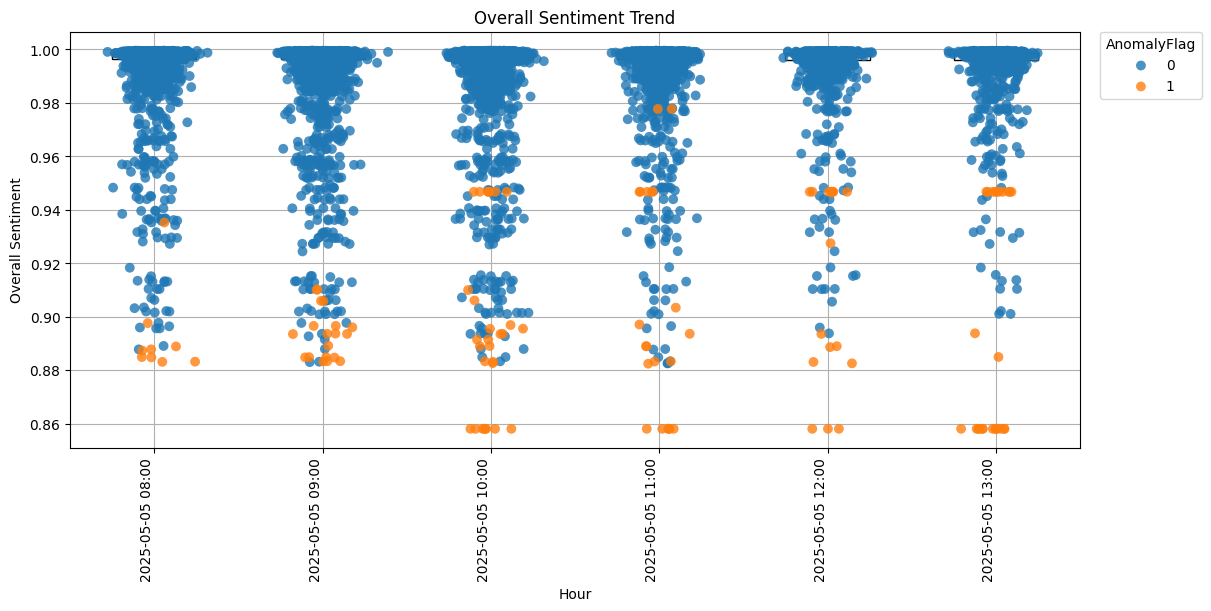

In [0]:
metric = 'average_score'
metric_print = "Overall Sentiment"
put.plot_distribution_over_time(data=df, x= 'DatetimeStamp', y= metric, 
                                ylabel=metric_print,
                                title=f"{metric_print} Trend",
                                freq = 'h', point_hue = 'AnomalyFlag')